In [1]:
OUTPUT_DIR = '/Users/alexchilton/Downloads/archive/'

DIR_REAL_TRAIN = '/Users/alexchilton/Downloads/archive/train'
DIR_REAL_TEST = '/Users/alexchilton/Downloads/archive/test'
JUST100 = '/Users/alexchilton/Downloads/archive/just100'

MODEL_LOCATION = '/Users/alexchilton/Downloads/archive/best_model.keras'
import torch 
#check for gpu
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [1]:
import nglview as nv
import ipywidgets

nv.__version__, ipywidgets.__version__


('3.1.2', '8.1.2')

In [2]:
nv.show_pdbid('3pqr')

NGLWidget()

In [3]:
import os
import random
from Bio import PDB

def load_pdb_files(directory):
    parser = PDB.PDBParser()
    pdb_files = [f for f in os.listdir(directory) if f.endswith('.pdb')]
    structures = []

    for pdb_file in pdb_files:
        file_path = os.path.join(directory, pdb_file)
        structure = parser.get_structure(pdb_file, file_path)
        structures.append(structure)

    return structures

def select_random_structures(structures, num_samples=3):
    return random.sample(structures, num_samples)

# Example usage
directory = '/Users/alexchilton/Downloads/archive/just100'
structures = load_pdb_files(directory)
random_structures = select_random_structures(structures)


In [4]:
import nglview as nv


def load_pdb_files(directory):
    pdb_files = [f for f in os.listdir(directory) if f.endswith('.pdb')]
    return pdb_files

# Function to load a PDB file and return an NGLView widget
def visualize_pdb(pdb_file):
    parser = PDB.PDBParser()
    structure = parser.get_structure('protein', pdb_file)
    io = PDB.PDBIO()
    io.set_structure(structure)
    io.save('temp.pdb')

    view = nv.show_file('temp.pdb')
    return view

def visualize_random_pdbs(directory, num_samples=3):
    pdb_files = load_pdb_files(directory)
    random_files = random.sample(pdb_files, num_samples)

    views = []
    for pdb_file in random_files:
        file_path = os.path.join(directory, pdb_file)
        view = visualize_pdb(file_path)
        views.append(view)

    return views

# Example usage
directory = '/Users/alexchilton/Downloads/archive/just100'
views = visualize_random_pdbs(directory)

# Display the views
for view in views:
    display(view)



NGLWidget()

NGLWidget()

NGLWidget()

In [8]:

views = []

file_path1 = 'generated_protein_1.pdb'
file_path2 = 'generated_protein_2.pdb'
file_path3 = 'generated_protein_3.pdb'
file_path4 = 'generated_protein_4.pdb'
file_path5 = 'generated_protein_5.pdb'

view = visualize_pdb(file_path1)
views.append(view)

view = visualize_pdb(file_path2)
views.append(view)
view = visualize_pdb(file_path3)
views.append(view)
view = visualize_pdb(file_path4)
views.append(view)
view = visualize_pdb(file_path5)
views.append(view)

for view in views:
    display(view)


#nv.show_pdbid('generated_protein_1.pdb')


NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

NGLWidget()

In [14]:
import numpy as np


In [7]:
def calculate_distance_matrix(pdb_file):
    parser = PDB.PDBParser()
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]
    chain = model.child_list[0]
    num_residues = len(chain)
    distance_matrix = np.zeros((num_residues, num_residues))

    for i, residue1 in enumerate(chain):
        for j, residue2 in enumerate(chain):
            distance_matrix[i, j] = residue1['CA'] - residue2['CA']

    return distance_matrix


def get_max_distance_map_size(pdb_files):
    parser = PDB.PDBParser()
    max_size = 0

    for pdb_file in pdb_files:
        structure = parser.get_structure('protein', pdb_file)
        distance_matrix = calculate_distance_matrix(structure)
        max_size = max(max_size, distance_matrix.shape[0])

    return max_size

# Example usage
pdb_files = ['AF-C0HKZ0-F1-model_v4.pdb', 'AF-C0HKY9-F1-model_v4.pdb', 'AF-P50984-F1-model_v4.pdb']  # Add your PDB file paths here
max_size = get_max_distance_map_size(pdb_files)
print(f"The maximum size of the distance map is: {max_size}")




# Example usage
pdb_file = 'AF-C0HKZ0-F1-model_v4.pdb'
distance_matrix = calculate_distance_matrix(pdb_file)
print(distance_matrix)


def pad_distance_matrix(distance_matrix, max_size):
    padded_matrix = np.full((max_size, max_size), np.inf)
    original_size = distance_matrix.shape[0]
    padded_matrix[:original_size, :original_size] = distance_matrix
    return padded_matrix

# Example usage
max_size = 28  # Define the maximum size based on your dataset
padded_matrix = pad_distance_matrix(distance_matrix, max_size)
print(padded_matrix)

AttributeError: 'Structure' object has no attribute 'readlines'

In [8]:
import os
import numpy as np
from Bio import PDB

def load_pdb_files(directory):
    parser = PDB.PDBParser()
    pdb_files = [f for f in os.listdir(directory) if f.endswith('.pdb')]
    structures = []

    for pdb_file in pdb_files:
        file_path = os.path.join(directory, pdb_file)
        structure = parser.get_structure(pdb_file, file_path)
        structures.append(structure)

    return structures

def calculate_distance_matrix(structure):
    model = structure[0]
    chain = model.child_list[0]
    num_residues = len(chain)
    distance_matrix = np.zeros((num_residues, num_residues))

    for i, residue1 in enumerate(chain):
        for j, residue2 in enumerate(chain):
            distance_matrix[i, j] = residue1['CA'] - residue2['CA']

    return distance_matrix

def get_max_distance_map_size(structures):
    max_size = 0

    for structure in structures:
        distance_matrix = calculate_distance_matrix(structure)
        max_size = max(max_size, distance_matrix.shape[0])

    return max_size

# Example usage
directory = '/Users/alexchilton/Downloads/archive/just100'
structures = load_pdb_files(directory)
max_size = get_max_distance_map_size(structures)

# Assuming `structures` is a list of PDB structures and `calculate_distance_matrix` is defined
for i, structure in enumerate(structures):
    distance_matrix = calculate_distance_matrix(structure)
    print(f"The size of the distance matrix at index {i} before padding is: {distance_matrix.shape}")

print(f"The maximum size of the distance map is: {max_size}")

# max size is 2326 in the trial one...

The size of the distance matrix at index 0 before padding is: (16, 16)
The size of the distance matrix at index 1 before padding is: (17, 17)
The size of the distance matrix at index 2 before padding is: (17, 17)
The size of the distance matrix at index 3 before padding is: (21, 21)
The size of the distance matrix at index 4 before padding is: (17, 17)
The size of the distance matrix at index 5 before padding is: (20, 20)
The size of the distance matrix at index 6 before padding is: (16, 16)
The size of the distance matrix at index 7 before padding is: (17, 17)
The size of the distance matrix at index 8 before padding is: (17, 17)
The size of the distance matrix at index 9 before padding is: (16, 16)
The size of the distance matrix at index 10 before padding is: (18, 18)
The size of the distance matrix at index 11 before padding is: (20, 20)
The size of the distance matrix at index 12 before padding is: (17, 17)
The size of the distance matrix at index 13 before padding is: (16, 16)
Th

In [9]:
import os
import numpy as np
from Bio import PDB
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [20]:
import os
import numpy as np
from Bio import PDB

def load_pdb_files(directory):
    parser = PDB.PDBParser()
    pdb_files = [f for f in os.listdir(directory) if f.endswith('.pdb')]
    structures = []

    for pdb_file in pdb_files:
        file_path = os.path.join(directory, pdb_file)
        structure = parser.get_structure(pdb_file, file_path)
        structures.append(structure)

    return structures

def calculate_distance_matrix(structure):
    model = structure[0]
    chain = model.child_list[0]
    num_residues = len(chain)
    distance_matrix = np.zeros((num_residues, num_residues))

    for i, residue1 in enumerate(chain):
        for j, residue2 in enumerate(chain):
            distance_matrix[i, j] = residue1['CA'] - residue2['CA']

    return distance_matrix

def pad_distance_matrix(distance_matrix, max_size):
    padded_matrix = np.zeros((max_size, max_size))
    original_size = distance_matrix.shape[0]
    padded_matrix[:original_size, :original_size] = distance_matrix
    return padded_matrix

def get_max_distance_map_size(structures):
    max_size = 0

    for structure in structures:
        distance_matrix = calculate_distance_matrix(structure)
        max_size = max(max_size, distance_matrix.shape[0])

    return max_size






In [21]:
# Load and preprocess data
directory = '/Users/alexchilton/Downloads/archive/just100'
structures = load_pdb_files(directory)
max_size = 28 #get_max_distance_map_size(structures)
print ('maxsize is ', max_size)

distance_matrices = [pad_distance_matrix(calculate_distance_matrix(structure), max_size) for structure in structures]
distance_matrices = np.array(distance_matrices)


# Print the size of each distance matrix after padding
for i, matrix in enumerate(distance_matrices):
    print(f'Size of distance matrix {i} after padding: {matrix.shape}')

import numpy as np
from scipy.sparse import csr_matrix
import pickle

# Assuming distance_matrices is a list of dense matrices
sparse_matrices = [csr_matrix(matrix) for matrix in distance_matrices]

# Save sparse matrices using pickle
with open('distance_matrices_sparse.pkl', 'wb') as f:
    pickle.dump(sparse_matrices, f)

maxsize is  28
Size of distance matrix 0 after padding: (28, 28)
Size of distance matrix 1 after padding: (28, 28)
Size of distance matrix 2 after padding: (28, 28)
Size of distance matrix 3 after padding: (28, 28)
Size of distance matrix 4 after padding: (28, 28)
Size of distance matrix 5 after padding: (28, 28)
Size of distance matrix 6 after padding: (28, 28)
Size of distance matrix 7 after padding: (28, 28)
Size of distance matrix 8 after padding: (28, 28)
Size of distance matrix 9 after padding: (28, 28)
Size of distance matrix 10 after padding: (28, 28)
Size of distance matrix 11 after padding: (28, 28)
Size of distance matrix 12 after padding: (28, 28)
Size of distance matrix 13 after padding: (28, 28)
Size of distance matrix 14 after padding: (28, 28)
Size of distance matrix 15 after padding: (28, 28)
Size of distance matrix 16 after padding: (28, 28)
Size of distance matrix 17 after padding: (28, 28)
Size of distance matrix 18 after padding: (28, 28)
Size of distance matrix 19

In [27]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

import pickle
from scipy.sparse import csr_matrix

# Load sparse matrices using pickle
with open('distance_matrices_sparse.pkl', 'rb') as f:
    sparse_matrices = pickle.load(f)

# Convert back to dense matrices if needed
dense_matrices = [matrix.toarray() for matrix in sparse_matrices]

# Convert the list of numpy arrays to a single numpy array
dense_matrices = np.array(dense_matrices)

# Assuming dense_matrices is a numpy array of shape (num_samples, height, width)
max_matrix_value = np.max(dense_matrices)
normalized_matrices = dense_matrices / max_matrix_value



# Convert to PyTorch tensor
distance_matrices = torch.tensor(normalized_matrices, dtype=torch.float32)

print(distance_matrices[0])


distance_matrices = distance_matrices.unsqueeze(1)  # Add channel dimension

# Create DataLoader
dataset = TensorDataset(distance_matrices)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

tensor([[0.0000, 0.0651, 0.0947, 0.0876, 0.1044, 0.1464, 0.1678, 0.1765, 0.2067,
         0.2386, 0.2524, 0.2773, 0.3095, 0.3306, 0.3644, 0.3396, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0651, 0.0000, 0.0650, 0.0920, 0.0849, 0.1021, 0.1428, 0.1635, 0.1758,
         0.2022, 0.2313, 0.2565, 0.2762, 0.2998, 0.3423, 0.3281, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0947, 0.0650, 0.0000, 0.0649, 0.0918, 0.0853, 0.0999, 0.1409, 0.1643,
         0.1723, 0.1956, 0.2352, 0.2544, 0.2646, 0.3081, 0.2972, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0876, 0.0920, 0.0649, 0.0000, 0.0649, 0.0941, 0.0869, 0.1005, 0.1440,
         0.1652, 0.1695, 0.2034, 0.2380, 0.2503, 0.2822, 0.2590, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [31]:
# Access the first distance matrix


first_distance_matrix = distance_matrices[0]

# Print the values within the first distance matrix
print(first_distance_matrix)
distance_matrices.shape

tensor([[[0.0000, 0.0651, 0.0947, 0.0876, 0.1044, 0.1464, 0.1678, 0.1765,
          0.2067, 0.2386, 0.2524, 0.2773, 0.3095, 0.3306, 0.3644, 0.3396,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0651, 0.0000, 0.0650, 0.0920, 0.0849, 0.1021, 0.1428, 0.1635,
          0.1758, 0.2022, 0.2313, 0.2565, 0.2762, 0.2998, 0.3423, 0.3281,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0947, 0.0650, 0.0000, 0.0649, 0.0918, 0.0853, 0.0999, 0.1409,
          0.1643, 0.1723, 0.1956, 0.2352, 0.2544, 0.2646, 0.3081, 0.2972,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0876, 0.0920, 0.0649, 0.0000, 0.0649, 0.0941, 0.0869, 0.1005,
          0.1440, 0.1652, 0.1695, 0.2034, 0.2380, 0.2503, 0.2822, 0.2590,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

torch.Size([100, 1, 28, 28])

In [32]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU()
        )

        # Calculate the flattened size after the convolutional layers
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, *input_shape)
            dummy_output = self.encoder(dummy_input)
            conv_output_size = dummy_output.numel()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(conv_output_size, 32)
        self.fc2_mean = nn.Linear(32, latent_dim)
        self.fc2_log_var = nn.Linear(32, latent_dim)
        self.fc3 = nn.Linear(latent_dim, conv_output_size)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, padding=1, stride=2, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        x = self.fc1(x)
        z_mean = self.fc2_mean(x)
        z_log_var = self.fc2_log_var(x)
        return z_mean, z_log_var

    def reparameterize(self, z_mean, z_log_var):
        std = torch.exp(0.5 * z_log_var)
        eps = torch.randn_like(std)
        return z_mean + eps * std

    def decode(self, z):
        x = self.fc3(z)
        x = x.view(-1, 64, input_shape[0] // 2, input_shape[1] // 2)
        x = self.decoder(x)
        return x

    def forward(self, x):
        z_mean, z_log_var = self.encode(x)
        z = self.reparameterize(z_mean, z_log_var)
        x_recon = self.decode(z)
        return x_recon, z_mean, z_log_var

In [26]:
import torch
import torch.nn as nn

class VAE2(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)  # Output both mean and log variance
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        if x.size(1) != 2:
            raise ValueError(f"Expected encoder output size to be divisible by 2, but got {x.size(1)}")
        z_mean, z_log_var = torch.chunk(x, 2, dim=1)
        return z_mean, z_log_var

    def reparameterize(self, z_mean, z_log_var):
        std = torch.exp(0.5 * z_log_var)
        eps = torch.randn_like(std)
        return z_mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        z_mean, z_log_var = self.encode(x)
        z = self.reparameterize(z_mean, z_log_var)
        x_recon = self.decode(z)
        return x_recon, z_mean, z_log_var

In [31]:
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')  # use first available GPU
    else:
        device = torch.device('cpu')
    return device


device = get_device()
print(f'device: {device}')

device: cpu


In [32]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size, code_size):
        self.input_size = list(input_size)  # shape of data sample
        self.flat_data_size = np.prod(self.input_size)
        self.hidden_size = 128

        self.code_size = code_size  # code size

        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),

            nn.Linear(self.flat_data_size, self.hidden_size),
            nn.ReLU(),

            nn.Linear(self.hidden_size, self.code_size),
            nn.Sigmoid(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(self.code_size, self.hidden_size),
            nn.ReLU(),

            nn.Linear(self.hidden_size, self.flat_data_size),
            nn.Tanh(),  # Think: why tanh?

            nn.Unflatten(1, self.input_size),
        )

    def forward(self, x, return_z=False):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return (decoded, encoded) if return_z else decoded

    def encode(self, x):
        return self.encoder(x)

    def decode(self, z):
        return self.decoder(z)*1.1

    def get_n_params(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)


def eval_on_samples(ae_model, epoch, samples):
    # this is called on end of each training epoch
    xns = samples['images_noisy']
    xns = torch.tensor(xns, dtype=torch.float32).to(device)
    #labels = samples['labels']

    with torch.no_grad():
        yz = ae_model(xns, return_z=True)
        yz = [el.detach().cpu().numpy() for el in yz]

        y = yz[0]
        z = yz[1:]

    res = {'z': z, 'y': y, 'epoch': epoch}
    return res

In [33]:
class VariationalConvolutionalAutoencoder(AutoEncoder):
    def __init__(self, input_size, code_size):
        super(VariationalConvolutionalAutoencoder, self).__init__(input_size, code_size)

        # nn.LeakyReLU(negative_slope=0.3)
        self.input_size = list(input_size)  # shape of data sample
        self.npix = np.prod(self.input_size)

        self.hidden_size = 64*1

        self.code_size = code_size  # code size

        self.encoder = nn.Sequential(
            nn.Conv2d(1,   16, 3, padding=1, stride=1), nn.LeakyReLU(negative_slope=0.3),
            nn.Conv2d(16,  16, 3, padding=1, stride=2), nn.LeakyReLU(negative_slope=0.3),
            nn.Conv2d(16,  32, 3, padding=1, stride=2), nn.LeakyReLU(negative_slope=0.3),
            nn.Conv2d(32,  32, 3, padding=1, stride=2), nn.LeakyReLU(negative_slope=0.3),
            nn.Conv2d(32,  32, 3, padding=1, stride=2), nn.LeakyReLU(negative_slope=0.3),
            nn.Conv2d(32,  64, 3, padding=1, stride=2), nn.LeakyReLU(negative_slope=0.3),

            nn.Flatten(),

            nn.Linear(self.hidden_size, 64), nn.LeakyReLU(negative_slope=0.3),

            # we want values in all R, thus no activation function is applied. self.n_code values for mean + self.n_code for log(variance)
            nn.Linear(64, self.code_size * 2),

        )
        self.decoder = nn.Sequential(
            nn.Linear(self.code_size, 64), nn.LeakyReLU(negative_slope=0.3),
            nn.Linear(64, self.hidden_size), nn.LeakyReLU(negative_slope=0.3),

            nn.Unflatten(1, (64, 1, 1)),

            nn.ConvTranspose2d(64, 32, 3, padding=1, output_padding=1, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(32, 32, 3, padding=1, output_padding=1, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(32, 32, 3, padding=1, output_padding=1, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, padding=1, output_padding=1, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(16, 16, 3, padding=1, output_padding=1, stride=2), nn.ReLU(),
            nn.Conv2d(16, 1, 3, padding=1, stride=1), nn.Tanh(),
        )

    def sample(self, eps=None):
        if eps is None:
            # samle from standard normal distribution
            eps = torch.randn((100, self.code_size))
        return self.decode(eps)

    def encode(self, x):
        z = self.encoder(x)
        z_mean, z_logvar = torch.split(z, split_size_or_sections=2, dim=1)
        return z_mean, z_logvar

    def reparameterize(self, z_mean, z_logvar):
        # reaparametrization trick: to sample z from N(mean, std):
        # z = mean + std * eps, where eps sampled from N(0, 1)
        eps = torch.randn_like(z_mean)
        z_std = torch.exp(z_logvar * .5)
        return eps * z_std + z_mean

    def decode(self, z):
        reconstruction = self.decoder(z)
        reconstruction = reconstruction[:, :, 2:-2, 2:-2]
        return reconstruction

    def forward(self, x, return_z=False):
        z_mean, z_logvar = self.encode(x)
        z = self.reparameterize(z_mean, z_logvar)
        reconstruction = self.decode(z)
        return (reconstruction, z_mean, z_logvar) if return_z else reconstruction

    def forward_and_KL_loss(self, x, y):
        reconstruction, z_mean, z_logvar = self(x, return_z=True)

        # tf impl:
        # loss_z_kl = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + tf.square(z_mean) -1.0 - z_logvar, axis=1)  # KL divergence from N(0, 1) to N(z_mean, tf.exp(z_logvar * .5))
        # loss_z_kl = tf.reduce_mean(loss_z_kl) / np.prod(self.data_size)  # but since we used mean in reconstruction loss - this term has to be normalized accordingly

        # pytorch impl:
        loss_z_kl = 0.5 * torch.sum(torch.exp(z_logvar) + torch.square(z_mean) -1.0 - z_logvar, dim=1)
        loss_z_kl = torch.mean(loss_z_kl) / self.npix

        return reconstruction, loss_z_kl


In [35]:
print (max_size)

28


In [37]:
# Initialize model, optimizer, and loss function
input_shape = (1, max_size, max_size)
in_size = distance_matrices.shape[1:]

latent_dim = 2
model = VariationalConvolutionalAutoencoder(input_shape, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Define loss function
def loss_function(x, x_recon, z_mean, z_log_var):
    recon_loss = nn.functional.mse_loss(x_recon, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())
    return recon_loss + kl_loss

# Train the VAE
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch_idx, batch in enumerate(dataloader):
        x = batch[0]
        optimizer.zero_grad()
        x_recon, z_mean, z_log_var = model(x)
        loss = loss_function(x, x_recon, z_mean, z_log_var)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(dataloader.dataset)}')

ValueError: too many values to unpack (expected 3)

In [33]:
from torchsummary import summary

# Assuming `model` is your VAE instance and `input_shape` is defined
input_shape = (1, max_size, max_size)  # Add the channel dimension
summary(model, input_shape)

NameError: name 'model' is not defined

In [34]:
# Initialize model, optimizer, and loss function
input_shape = (max_size, max_size)
latent_dim = 2
model = VAE(input_shape, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Define loss function
def loss_function(x, x_recon, z_mean, z_log_var):
    recon_loss = nn.functional.mse_loss(x_recon, x, reduction='sum')
    kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())
    return recon_loss + kl_loss

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [35]:
import torch

# Function to save the model and optimizer state
def save_checkpoint(model, optimizer, epoch, loss, filename='vae_checkpoint.pth'):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, filename)
    

In [64]:
import torch

# Function to load the model and optimizer state
def load_checkpoint(model, optimizer, filename='vae_checkpoint.pth'):
    checkpoint = torch.load(filename)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return model, optimizer, epoch, loss

Starting epoch 1
Batch 0, Loss: 4778.64306640625
Epoch 1, Loss: 110.60449569702149
Starting epoch 2
Batch 0, Loss: 1312.582275390625
Epoch 2, Loss: 30.64365577697754
Starting epoch 3
Batch 0, Loss: 556.8648681640625
Epoch 3, Loss: 19.054879302978517
Starting epoch 4
Batch 0, Loss: 633.9617309570312
Epoch 4, Loss: 17.857266387939454
Starting epoch 5
Batch 0, Loss: 489.5675964355469
Epoch 5, Loss: 15.753241386413574
Starting epoch 6
Batch 0, Loss: 380.15228271484375
Epoch 6, Loss: 12.37989101409912
Starting epoch 7
Batch 0, Loss: 331.7915344238281
Epoch 7, Loss: 9.922653465270995
Starting epoch 8
Batch 0, Loss: 247.8016357421875
Epoch 8, Loss: 9.123836631774902
Starting epoch 9
Batch 0, Loss: 311.46142578125
Epoch 9, Loss: 9.05854476928711
Starting epoch 10
Batch 0, Loss: 319.2389831542969
Epoch 10, Loss: 8.10593542098999
Starting epoch 11
Batch 0, Loss: 257.5272216796875
Epoch 11, Loss: 8.045480556488037
Starting epoch 12
Batch 0, Loss: 216.96408081054688
Epoch 12, Loss: 7.8559674072265

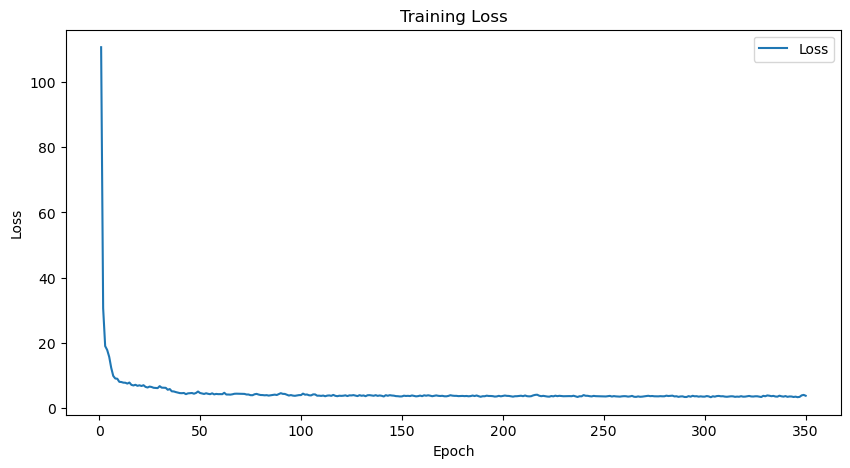

In [66]:
# Initialize model, optimizer, and loss function
import matplotlib.pyplot as plt


max_size = 28
input_shape = (max_size, max_size)
latent_dim = 2
model = VAE(input_shape, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Load checkpoint if exists
start_epoch = 0
if os.path.exists('vae_checkpoint.pth'):
    model, optimizer, start_epoch, _ = load_checkpoint(model, optimizer)

# Initialize lists to store loss values
epoch_losses = []

# Train the VAE
num_epochs = 350
model.train()
for epoch in range(start_epoch, num_epochs):
    total_loss = 0
    print(f'Starting epoch {epoch + 1}')
    for batch_idx, batch in enumerate(dataloader):
        x = batch[0]
        optimizer.zero_grad()
        x_recon, z_mean, z_log_var = model(x)
        loss = loss_function(x, x_recon, z_mean, z_log_var)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        if batch_idx % 10 == 0:
            print(f'Batch {batch_idx}, Loss: {loss.item()}')
            #print(f'z_mean: {z_mean}')
            #print(f'z_log_var: {z_log_var}')
            #print(f'x_recon shape: {x_recon.shape}')
            #print(f'x shape: {x.shape}')

    # Save checkpoint
    save_checkpoint(model, optimizer, epoch, total_loss / len(dataloader.dataset))

    # Append the total loss for this epoch
    epoch_losses.append(total_loss / len(dataloader.dataset))
    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(dataloader.dataset)}')

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(range(start_epoch + 1, num_epochs + 1), epoch_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [43]:
import torch

# Function to generate new proteins
def generate_proteins(model, num_samples, latent_dim, device):
    # Sample from the standard normal distribution
    z = torch.randn(num_samples, latent_dim).to(device)

    # Decode the samples
    with torch.no_grad():
        generated_proteins = model.decode(z)

    return generated_proteins

# Example usage
num_samples = 5  # Number of new proteins to generate
latent_dim = 2  # Latent dimension of the VAE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming `model` is your trained VAE model
model.to(device)
model.eval()  # Set the model to evaluation mode

new_proteins = generate_proteins(model, num_samples, latent_dim, device)

# Print the generated proteins
for i, protein in enumerate(new_proteins):
    print(f"Generated Protein {i + 1}:")
    print(protein)

Generated Protein 1:
tensor([[[3.5809e-03, 6.4742e-02, 1.0305e-01, 1.2262e-01, 1.5590e-01,
          1.8902e-01, 2.1796e-01, 2.4296e-01, 2.6408e-01, 2.7574e-01,
          2.8496e-01, 2.8722e-01, 3.0532e-01, 3.2943e-01, 3.5703e-01,
          3.7442e-01, 3.8115e-01, 5.7217e-02, 7.6914e-04, 1.2128e-04,
          6.3370e-07, 2.4990e-06, 4.6622e-07, 4.0748e-06, 5.7129e-06,
          4.1842e-05, 2.9064e-03, 5.2040e-03],
         [6.5446e-02, 1.7003e-03, 6.2392e-02, 9.7141e-02, 1.0716e-01,
          1.4574e-01, 1.7741e-01, 2.0479e-01, 2.1655e-01, 2.3795e-01,
          2.5388e-01, 2.5745e-01, 2.7390e-01, 2.9931e-01, 3.1159e-01,
          3.4254e-01, 3.3255e-01, 5.5307e-02, 2.1768e-03, 1.7463e-05,
          1.3123e-06, 5.7822e-07, 2.3986e-07, 7.7953e-07, 2.2720e-06,
          4.2153e-06, 3.7578e-04, 1.7369e-03],
         [1.0446e-01, 6.6948e-02, 2.6946e-03, 6.7825e-02, 1.0421e-01,
          1.1340e-01, 1.3330e-01, 1.7724e-01, 1.9049e-01, 1.9640e-01,
          2.2312e-01, 2.3446e-01, 2.5371e-01,

In [44]:
import numpy as np

def denormalize_distance_matrices(normalized_matrices, max_value):
    return normalized_matrices * max_value

In [51]:
from scipy.spatial import distance_matrix

def reconstruct_coordinates(distance_matrix):
    # Ensure the distance matrix is 2D
    if distance_matrix.ndim == 3:
        # Assuming the first dimension is the batch size, take the first element
        distance_matrix = distance_matrix[0]

    # Check if the distance matrix is now 2D
    if distance_matrix.ndim != 2:
        raise ValueError("Distance matrix must be 2D after processing.")

    # Ensure the distance matrix is symmetric
    distance_matrix = (distance_matrix + distance_matrix.T) / 2

    # Use MDS to reconstruct 3D coordinates
    coordinates = mds_reconstruct(distance_matrix)
    return coordinates

def mds_reconstruct(distance_matrix):
    # Example implementation using MDS from scikit-learn
    from sklearn.manifold import MDS
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=0)
    coordinates = mds.fit_transform(distance_matrix)
    return coordinates

In [54]:
from Bio.PDB import PDBIO, Structure, Model, Chain, Residue, Atom

def write_pdb(coordinates, output_file):
    structure = Structure.Structure('protein')
    model = Model.Model(0)
    chain = Chain.Chain('A')

    for i, coord in enumerate(coordinates):
        residue = Residue.Residue((' ', i, ' '), 'GLY', '')
        atom = Atom.Atom('CA', coord, 1.0, 1.0, ' ', 'CA', i, element='C')
        residue.add(atom)
        chain.add(residue)

    model.add(chain)
    structure.add(model)

    io = PDBIO()
    io.set_structure(structure)
    io.save(output_file)

In [55]:
# Assuming `new_proteins` is the generated normalized distance matrices
max_value = max_matrix_value  # Replace with the actual max value used for normalization
denormalized_matrices = denormalize_distance_matrices(new_proteins, max_value)

for i, distance_matrix in enumerate(denormalized_matrices):
    coordinates = reconstruct_coordinates(distance_matrix)
    output_file = f'generated_protein_{i + 1}.pdb'
    write_pdb(coordinates, output_file)
    print(f'Saved generated protein {i + 1} to {output_file}')

Saved generated protein 1 to generated_protein_1.pdb
Saved generated protein 2 to generated_protein_2.pdb
Saved generated protein 3 to generated_protein_3.pdb
Saved generated protein 4 to generated_protein_4.pdb
Saved generated protein 5 to generated_protein_5.pdb


/opt/anaconda3/envs/chem2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/anaconda3/envs/chem2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/anaconda3/envs/chem2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/anaconda3/envs/chem2/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppres

In [58]:
import matplotlib.pyplot as plt

def plot_distance_matrices(training_data, generated_data):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i in range(5):
        # Plot training data distance matrix
        training_matrix = training_data[i].squeeze().numpy()  # Convert tensor to numpy array
        ax = axes[0, i]
        cax = ax.matshow(training_matrix, cmap='viridis')
        fig.colorbar(cax, ax=ax)
        ax.set_title(f'Training Data {i+1}')

        # Plot generated data distance matrix
        generated_matrix = generated_data[i].squeeze().numpy()  # Convert tensor to numpy array
        ax = axes[1, i]
        cax = ax.matshow(generated_matrix, cmap='viridis')
        fig.colorbar(cax, ax=ax)
        ax.set_title(f'Generated Data {i+1}')

    plt.tight_layout()
    plt.show()

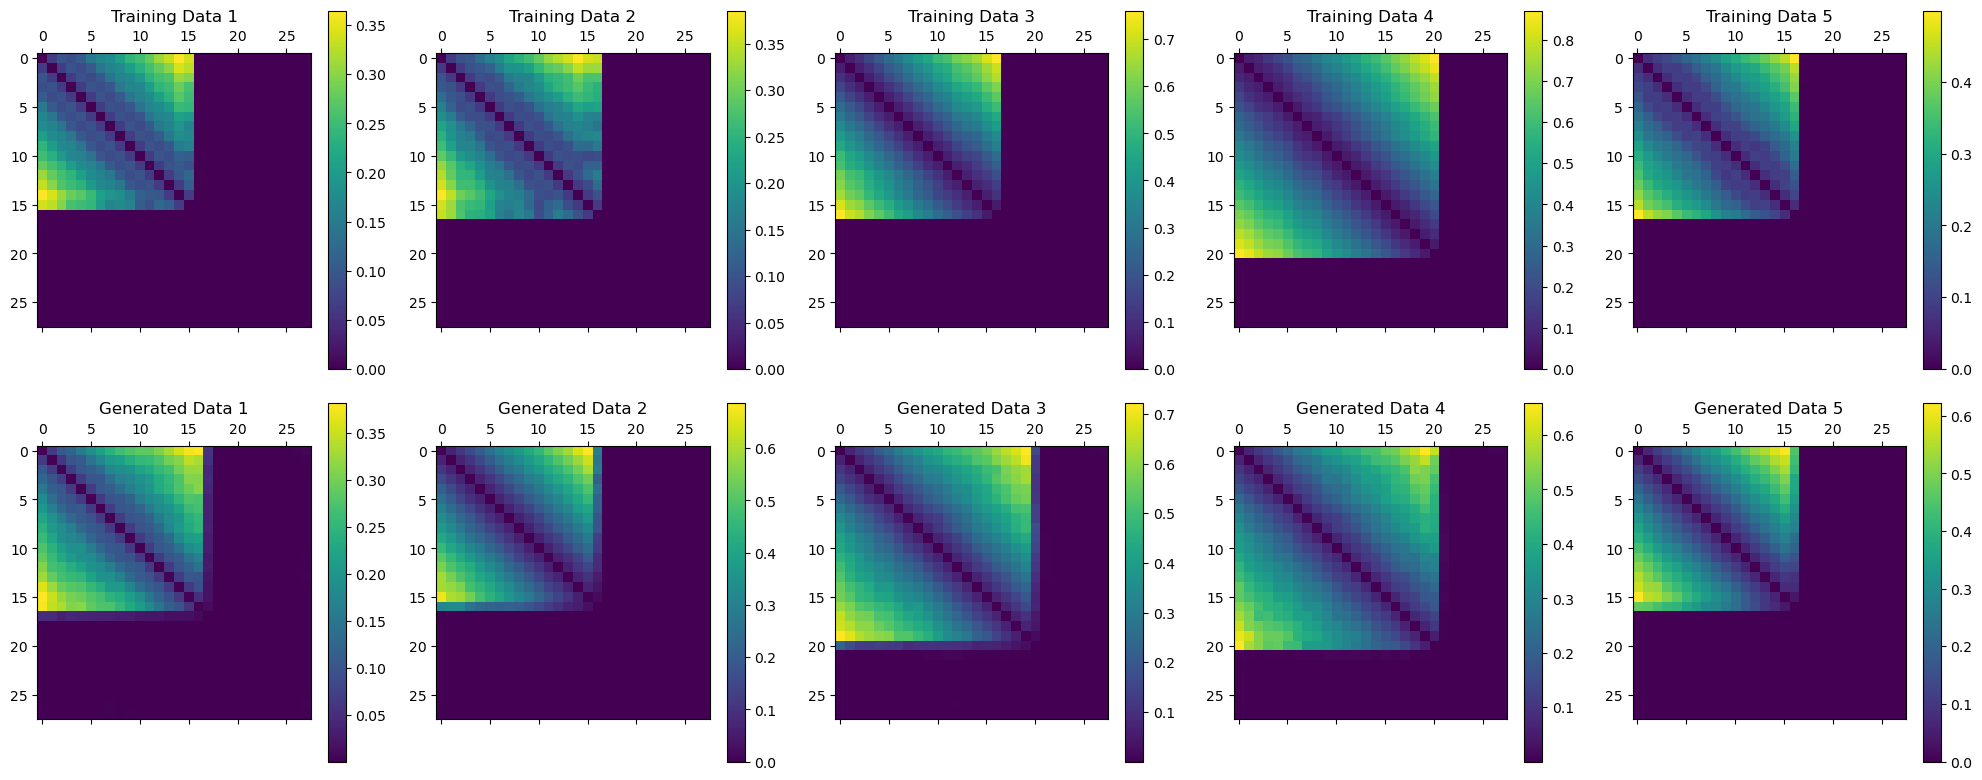

In [59]:
plot_distance_matrices(distance_matrices, new_proteins)

In [63]:
nv.show_pdbid('/Users/alexchilton/Downloads/generated_protein_1.pdb')



HTTPError: HTTP Error 404: Not Found